In [31]:
import pickle
import os

import pandas as pd

In [32]:
DIR_TOPIC_DICT = r'total_topic_dict'

In [33]:
square_list_dir = os.listdir(DIR_TOPIC_DICT)
len(square_list_dir)

1683

In [34]:
squares_dicts = {}

for file_name_dict in square_list_dir:
    dict_path = os.path.join(DIR_TOPIC_DICT, file_name_dict)
    this_id = file_name_dict.split('.pickle')[0].split('_')[-1]
    with open(dict_path, 'rb') as handle:
        this_dict = pickle.load(handle)
        
    renamed_dict = {}
    
    for key_name in list(this_dict.keys()):
        if not ('свой' in this_dict[key_name] and 'ребёнок' in this_dict[key_name]):
            new_name = '_'.join(this_dict[key_name])
            renamed_dict[this_id + '_' + new_name] = this_dict.pop(key_name)
    
    squares_dicts.update(renamed_dict) 

In [35]:
def parse_file_name(file_name):
    square_number, *top_5 = file_name.split('_')
    
    return int(square_number.split('.')[0]), top_5

In [75]:
topics_df = pd.DataFrame(columns=['square_contain_id', 'top5'])

In [76]:
ids = []
top_5s = []

for key in squares_dicts.keys():
    name, top_5 = parse_file_name(key)
    
    ids.append(name)
    top_5s.append(top_5)

In [77]:
topics_df['square_contain_id'] = ids
topics_df['top5'] = top_5s

topics_df.sort_values('square_contain_id', inplace=True)

In [78]:
topics_df.head()

,square_contain_id,top5
5678,56384,"[спб, маникюр, ноготь, озерко, ресница, волос,..."
5058,56455,"[спб, волос, ресница, наращивание, кожа, красо..."
5060,56455,"[спб, маникюр, платье, ноготь, красота, дизайн..."
5059,56455,"[спб, свой, ресторан, цвет, подарок, питер, ма..."
5874,57010,"[акро, спорт, гимнастика, акробатика, фитнес, ..."


In [79]:
square_ids = []
top5s = []

for row in topics_df.iloc:
    if len(square_ids) == 0 or row['square_contain_id'] != square_ids[-1]:
        square_ids.append(row['square_contain_id'])
        top5s.append([row['top5']])
    else:
        top5s[-1].append(row['top5'])

In [89]:
topics_df = pd.DataFrame({
    'square_contain_id': square_ids,
    'top5': top5s,
})

In [90]:
squared_geometry_df = pd.read_csv('squared_geometry.csv', sep='\t', dtype='str').dropna()

In [91]:
squared_geometry_df.head()

,square_contain_id,geometry
0,357107.0,POINT (3381689.374090418 8361811.789603177)
1,272319.0,POINT (3375058.9059293 8375088.506933719)
2,218220.0,POINT (3379612.211914747 8383540.784286487)
3,202133.0,POINT (3363471.871428153 8386093.336480835)
4,208624.0,POINT (3375502.483242348 8385033.31520804)


In [92]:
squared_geometry_df['square_contain_id'] = squared_geometry_df['square_contain_id'].str.split('.').str[0]
squared_geometry_df['square_contain_id'] = squared_geometry_df['square_contain_id'].astype('int64')

In [93]:
squared_geometry_df['geometry'] = squared_geometry_df['geometry'].str.split().str[1:].apply(lambda x: (x[0][1:], x[1][:-1]))

In [94]:
squared_geometry_df['x'] = squared_geometry_df.geometry.str[0]
squared_geometry_df['y'] = squared_geometry_df.geometry.str[1]

In [95]:
squared_geometry_df.head()

,square_contain_id,geometry,x,y
0,357107,"(3381689.374090418, 8361811.789603177)",3381689.374090418,8361811.789603177
1,272319,"(3375058.9059293, 8375088.506933719)",3375058.9059293,8375088.506933719
2,218220,"(3379612.211914747, 8383540.784286487)",3379612.211914747,8383540.784286487
3,202133,"(3363471.871428153, 8386093.336480835)",3363471.871428153,8386093.336480835
4,208624,"(3375502.483242348, 8385033.31520804)",3375502.483242348,8385033.31520804


In [96]:
topics_df = topics_df.merge(squared_geometry_df.drop('geometry', axis=1), on='square_contain_id')

In [97]:
topics_df.top5 = topics_df.top5.apply(lambda x: tuple(x))

In [98]:
topics_df

,square_contain_id,top5,x,y
0,56384,"([спб, маникюр, ноготь, озерко, ресница, волос...",3375815.596884042,8408983.544066858
1,56455,"([спб, волос, ресница, наращивание, кожа, крас...",3382918.994302304,8408921.538708122
2,57010,"([акро, спорт, гимнастика, акробатика, фитнес,...",3374690.438414773,8408818.250917628
3,57750,"([маникюр, гельлак, шеллак, спб, гражданка, но...",3384995.272545558,8408779.21883109
4,57800,"([спб, кухня, ремонт, торт, дизайн, квартира, ...",3390041.713578166,8408743.888105495
...,...,...,...,...
1636,356645,"([волос, бровь, ботокс, окрашивание, процедура...",3399222.039701732,8361871.359175503
1637,357071,"([спб, дизайн, маникюр, кухня, массаж, интерье...",3378134.663459918,8361775.706199327
1638,357107,"([платье, наличие, шоурум, спб, одежда, светла...",3381689.374090418,8361811.789603177
1639,357153,"([спб, новорождённый, фотограф, фотосессия, фо...",3386312.193253592,8361724.762451168


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
from skimage import io

In [107]:
topics_df.query('square_contain_id == 213127')

,square_contain_id,top5,x,y
976,213127,"([процедура, бровь, эпиляция, лазерный, волосо...",3379882.379465372,8384391.79579616


In [109]:
x_vos_image = 552
y_vos_image = 680

x_other_image = 486
y_other_image = 869

In [110]:
x_vos = 3379882.379465372
y_vos = 8384391.79579616

x_other = 3376407.514286985
y_other = 8374853.501629585

In [111]:
def get_new_coords(row):
    """
    Спроецировал квадраты к изображению с помощью двух 
    опорных точек: 273607, 213127
    """
    
    row = row.copy()
    
    row['x'] -= x_vos
    row['y'] -= y_vos
    
    dxx = (x_vos - x_other) / (x_vos_image - x_other_image)
    dyy = (y_vos - y_other) / (y_vos_image - y_other_image)
    
    row['x'] /= dxx
    row['y'] /= dyy
    
    row['x'] += x_vos_image
    row['y'] += y_vos_image
    
    return row

In [112]:
coordinates = topics_df[['top5', 'x', 'y']].copy()
coordinates[['x', 'y']] = coordinates[['x', 'y']].astype(float)

coordinates = coordinates.apply(get_new_coords, axis=1)

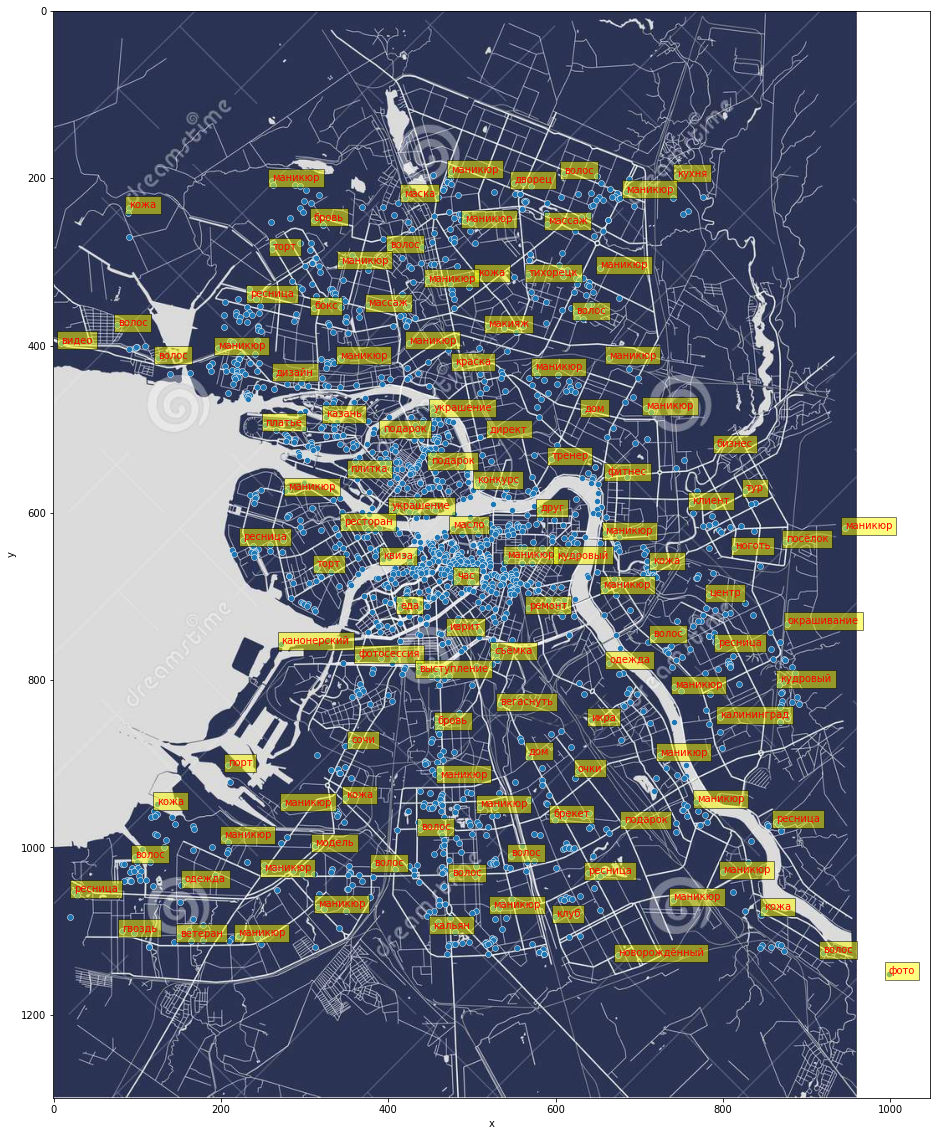

In [113]:
coordinates_array = []

plt.figure(figsize=(20, 20))

plt.imshow(io.imread('spb.jpeg'))
sns.scatterplot(x='x', y='y', data=coordinates)

for i in range(coordinates.shape[0]):
    x = coordinates.x[i]+0.3
    y = coordinates.y[i]+0.3
        
    fl = True
    
    for x_c, y_c in coordinates_array:
        if ((x_c - x) ** 2 + (y_c - y) ** 2) ** 0.5 < 60:
            fl = False
            break
        
    if fl:
        k = 0
        
        while coordinates.top5[i][0][k] in ('спб', 'всадник', 'медный', 'пётр', 'питер', 'свой', 'привет', 'тема:', '\n'):
            k += 1
            
        label = coordinates.top5[i][0][k]
        
        plt.text(x=x, y=y,s=label, 
              fontdict=dict(color='red',size=10),
              bbox=dict(facecolor='yellow',alpha=0.5))
    
        coordinates_array.append((x, y))
        
        
plt.savefig('spb-points.jpg')

In [114]:
import numpy as np

In [115]:
from pyproj import Proj
import pyproj

wgs84 = Proj('epsg:4326')
IrishGrid = Proj('epsg:3857')

a = np.meshgrid(x_vos, y_vos)
x = pyproj.transform(IrishGrid, wgs84, *a)
x1, y1 = x[0][0][0], x[1][0][0]

<ipython-input-115-9001ce6f7471>:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x = pyproj.transform(IrishGrid, wgs84, *a)


In [116]:
def get_new_coords_by_map(row):
    """
    Спроецировал квадраты к изображению с помощью двух 
    опорных точек: 273607, 213127
    """
    
    row = row.copy()
    
    a = np.meshgrid(row['x'], row['y'])
    x = pyproj.transform(IrishGrid, wgs84, *a)
    
    row['x'] = x[0][0][0]
    row['y'] = x[1][0][0]
        
    return row

In [117]:
%%time

coordinates = topics_df[['square_contain_id', 'top5', 'x', 'y']].copy()
coordinates[['x', 'y']] = coordinates[['x', 'y']].astype(float)

coordinates = coordinates.apply(get_new_coords_by_map, axis=1)

<ipython-input-116-5a8106ada872>:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x = pyproj.transform(IrishGrid, wgs84, *a)


CPU times: user 1min 29s, sys: 2.9 s, total: 1min 31s
Wall time: 1min 32s


In [118]:
import requests
import json

st_districts_geojson = requests.get(
    'https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-st-petersburg.geojson').json()

In [119]:
import os
import json
import random
import requests

from ipywidgets import HTML
from ipyleaflet import Map, GeoJSON, basemaps, Marker


def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


m = Map(basemap=basemaps.CartoDB.Positron, center=(59.8907303, 30.3214183), zoom=10)


for row in coordinates.sample(100).iloc:
    x, y = row['x'], row['y']

    row = coordinates.iloc[i]
    marker = Marker(location=(x, y))
    # Popup associated to a layer
    message = HTML()
    message_value = f"""
    Квадрат: {row['square_contain_id']}</br>
    Координаты: {row['x']}, {row['y']}</br>
    Всего тем: {len(row['top5'][:5])}</br>
    {" ".join([f'Тема {i+1}: ' + " ".join([row["top5"][i][k] for k in range(5)]) + '</br>' for i in range(len(row['top5']))])}
    """
    
    message.value = message_value
    marker.popup = message

    m.add_layer(marker)

geo_json = GeoJSON(
    data=st_districts_geojson
)
m.add_layer(geo_json)

m

Map(center=[59.8907303, 30.3214183], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [120]:
import os
import json
import random
import requests

from ipywidgets import HTML
from ipyleaflet import Map, GeoJSON, basemaps, Marker, Circle


def random_color(feature):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


m = Map(basemap=basemaps.CartoDB.Positron, center=(59.8907303, 30.3214183), zoom=10)


for row in coordinates.sample(100).iloc:
    x, y = row['x'], row['y']

    row = coordinates.iloc[i]
    
    circle = Circle(location = (x, y))
    circle.radius = 40
    circle.color = "green"
    circle.fill_color = "green"

    m.add_layer(circle)


m.add_layer(geo_json)

m

Map(center=[59.8907303, 30.3214183], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [121]:
topics_df['latitude'] = coordinates['x']
topics_df['longitude'] = coordinates['y']

In [124]:
topics_df.drop(['x', 'y'], axis=1).to_csv('squares_topics.csv', sep='\t', index=False)

In [125]:
topics_df.head()

,square_contain_id,top5,x,y,latitude,longitude
0,56384,"([спб, маникюр, ноготь, озерко, ресница, волос...",3375815.596884042,8408983.544066858,60.041502,30.325467
1,56455,"([спб, волос, ресница, наращивание, кожа, крас...",3382918.994302304,8408921.538708122,60.041223,30.389278
2,57010,"([акро, спорт, гимнастика, акробатика, фитнес,...",3374690.438414773,8408818.250917628,60.040760,30.315360
3,57750,"([маникюр, гельлак, шеллак, спб, гражданка, но...",3384995.272545558,8408779.21883109,60.040585,30.407930
4,57800,"([спб, кухня, ремонт, торт, дизайн, квартира, ...",3390041.713578166,8408743.888105495,60.040426,30.453263
